In [3]:
import wikipedia
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy

articles = list[str]()
article_names = list[str]()

In [4]:
f1_article_names = ['Formula 1 Car',
                    'History of Formula One',
                    'Grands Prix',
                    'Open-wheel car',
                    'Lewis Hamilton',
                    'Max Verstappen',
                    'safety car',
                    'race marshals',
                    'pole position',
                    'Pit stop',
                    'Bernd Mayländer',
                    'FIA Super Licence',
                    'Scuderia Toro Rosso',
                    'Red Bull Racing',
                    'Ground effect (cars)']
article_names += f1_article_names

for i, article in enumerate(f1_article_names):
    articles.append(wikipedia.page(article).content)
    print(f'{i + 1}: {articles[-1][:100]}...')

1: A Formula One car or F1 car is a single-seat, open-cockpit, open-wheel formula racing car with subst...
2: Formula One automobile racing has its roots in the European Grand Prix championships of the 1920s an...
3: The 2024 FIA Formula One World Championship is a motor racing championship for Formula One cars and ...
4: An open-wheel car is a car with the wheels outside the car's main body, and usually having only one ...
5: Sir Lewis Carl Davidson Hamilton   (born 7 January 1985) is a British racing driver competing in For...
6: Max Emilian Verstappen (Dutch pronunciation: [ˈmɑks vɛrˈstɑ.pə(n)]; born 30 September 1997) is a Bel...
7: In motorsport, a safety car, or a pace car, is an automobile which limits the speed of competing car...
8: Marshal is a term used in several official titles in various branches of society. As marshals became...
9: In a motorsports race, the pole position is usually the best and "statistically the most advantageou...
10: In motorsports, a pit stop is a p

In [5]:
cybersecurity_article_names = ['Application Security',
                               'Malware',
                               'Penetration Testing',
                               'Vulnerability',
                               'Common Vulnerability Scoring System',
                               'CSP',
                               'Cross-site scripting',
                               'Bug Bounty',
                               'SQL injection',
                               'Security Operations Center',
                               'Kaspersky',
                               'Web Security',
                               'Password',
                               'Authentication',
                               'Authorization']
article_names += cybersecurity_article_names

for i, article in enumerate(cybersecurity_article_names):
    articles.append(wikipedia.page(article).content)
    print(f'{i + 1}: {articles[-1][:100]}...')

1: Application security (short AppSec) includes all tasks that introduce a secure software development ...
2: Malware (a portmanteau for malicious software) is any software intentionally designed to cause disru...
3: A penetration test, colloquially known as a pentest, is an authorized simulated cyberattack on a com...
4: Vulnerability refers to "the quality or state of being exposed to the possibility of being attacked ...
5: The Common Vulnerability Scoring System (CVSS) is a free and open industry standard for assessing th...
6: A cap is a flat headgear, usually with a visor. Caps have crowns that fit very close to the head. Th...
7: Cross-site scripting (XSS) is a type of security vulnerability that can be found in some web applica...
8: A bug bounty program is a deal offered by many websites, organizations, and software developers by w...
9: In computing, SQL injection is a code injection technique used to attack data-driven applications, i...
10: A security operations center (SOC

In [6]:
articles3 = list[str]()
chess_article_names = ['Chess',
                       'Pawn (chess)',
                       'Check (chess)',
                       'Checkmate',
                       'Castling',
                       'Fifty-move rule',
                       'Garry Kasparov',
                       'Algebraic notation (chess)',
                       'FIDE Master',
                       'Grandmaster (chess)',
                       'Tata Steel Chess Tournament',
                       'Hikaru Nakamura',
                       'Mathematical chess problem',
                       'Online chess',
                       'Deep Blue versus Garry Kasparov']
article_names += chess_article_names

for i, article in enumerate(chess_article_names):
    articles.append(wikipedia.page(article).content)
    print(f'{i + 1}: {articles[-1][:100]}...')

assert len(chess_article_names) + len(f1_article_names) + len(cybersecurity_article_names) == len(set(articles))

1: The thorax (pl.: thoraces or thoraxes) or chest is a part of the anatomy of mammals and other tetrap...
2: The pawn (♙, ♟) is the most numerous and weakest piece in the game of chess. It may move one square ...
3: In chess and similar games, check is a condition that occurs when a player's king is under threat of...
4: Checkmate (often shortened to mate) is any game position in chess and other chess-like games in whic...
5: Castling is a move in chess. It consists of moving the king two squares toward a rook on the same ra...
6: The fifty-move rule in chess states that a player can claim a draw if no capture has been made and n...
7: Garry Kimovich Kasparov (born Garik Kimovich Weinstein on 13 April 1963) is a Russian chess grandmas...
8: Algebraic notation is the standard method for recording and describing the moves in a game of chess....
9: FIDE titles are awarded by the international chess governing body FIDE (Fédération Internationale de...
10: Grandmaster (GM) is a title award

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple/
Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 11.1/12.8 MB 71.3 kB/s eta 0:00:25
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/slagov/Documents/spar/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/slagov/Documents/spar/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "/Users/slagov/Documents/spar/venv/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/Users/slagov/Documents/spar/venv/lib/python3.12/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^

In [8]:
# Загрузка стоп-слов и пунктуации
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

nlp = spacy.load('en_core_web_sm')

def preprocess(txt):
    stemmer = SnowballStemmer('english')
    txt = nlp(txt.lower()) # lower() и лемматизировать
    stemmed_words = [stemmer.stem(token.lemma_) for token in txt if token.text not in list(punctuation) + stopwords.words('english')]
    return ' '.join(stemmed_words)

# Преобразование векторов TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = preprocess)
X = vectorizer.fit_transform(articles)

print(vectorizer.get_feature_names_out())
print(X.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/slagov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/slagov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['00' '000' '002' ... '万维网' '戶籍' '無戶籍國民']
(45, 9529)


In [9]:
print(X[0,])

  (0, 2254)	0.003686461582298182
  (0, 3723)	0.005984218045624493
  (0, 1044)	0.0034688764489526395
  (0, 4084)	0.004225638690191413
  (0, 1078)	0.005011375138627945
  (0, 7844)	0.007612799262113292
  (0, 3434)	0.0022639009413813406
  (0, 7149)	0.0017384121891657748
  (0, 5258)	0.003020663182620114
  (0, 8739)	0.006484328066979141
  (0, 6608)	0.007189193553195792
  (0, 5747)	0.014378387106391584
  (0, 61)	0.005279352559407842
  (0, 569)	0.007189193553195792
  (0, 9128)	0.006484328066979141
  (0, 4369)	0.006484328066979141
  (0, 910)	0.005011375138627945
  (0, 2235)	0.0034688764489526395
  (0, 3733)	0.007189193553195792
  (0, 7699)	0.003020663182620114
  (0, 746)	0.007189193553195792
  (0, 5698)	0.005984218045624493
  (0, 5003)	0.007189193553195792
  (0, 3535)	0.006484328066979141
  (0, 9221)	0.005984218045624493
  :	:
  (0, 8883)	0.0040743770518365426
  (0, 3999)	0.006041326365240228
  (0, 7180)	0.06513221704163988
  (0, 3353)	0.00860820463279573
  (0, 2293)	0.009304602434519983
  (0, 

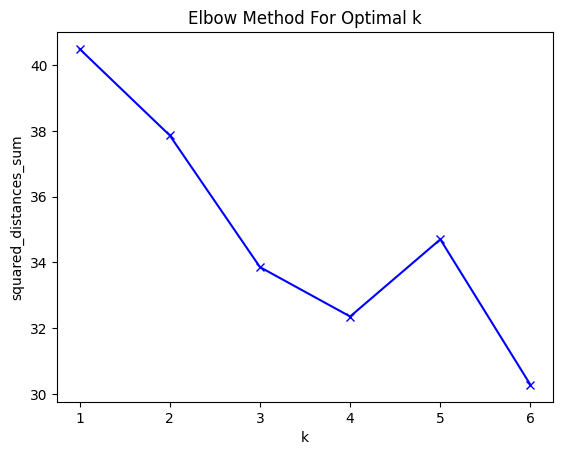

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

squared_distances_sum = []
k_range = range(1, 7)

for k in k_range:
    km = KMeans(n_clusters=k, max_iter=200)
    km = km.fit(X)
    squared_distances_sum.append(km.inertia_)

plt.plot(k_range, squared_distances_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances_sum')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)
model.fit(X)

labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(article_names, labels)), columns=['title', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                                  title  cluster
31                         Pawn (chess)        0
27                             Password        0
26                         Web Security        0
34                             Castling        0
35                      Fifty-move rule        0
23                        SQL injection        0
43                         Online chess        0
21                 Cross-site scripting        0
37           Algebraic notation (chess)        0
30                                Chess        0
38                          FIDE Master        1
39                  Grandmaster (chess)        1
40          Tata Steel Chess Tournament        1
14                 Ground effect (cars)        1
0                         Formula 1 Car        1
12                  Scuderia Toro Rosso        1
1                History of Formula One        1
2                           Grands Prix        1
3                        Open-wheel car        1
4                   

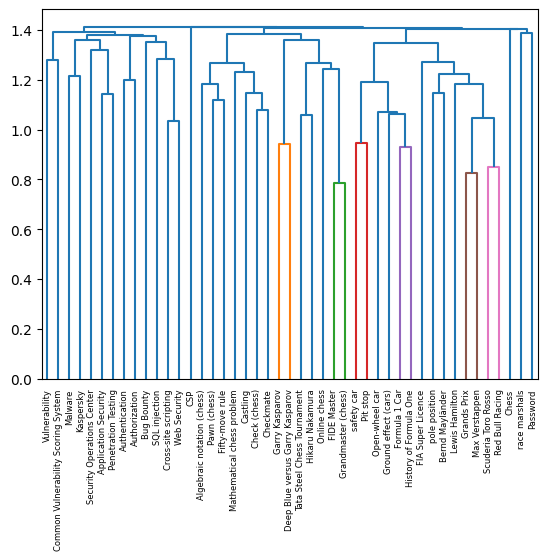

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(X.toarray(), method='complete')
dendrogram(mergings, labels=article_names, leaf_rotation=90, leaf_font_size=6)

plt.show()

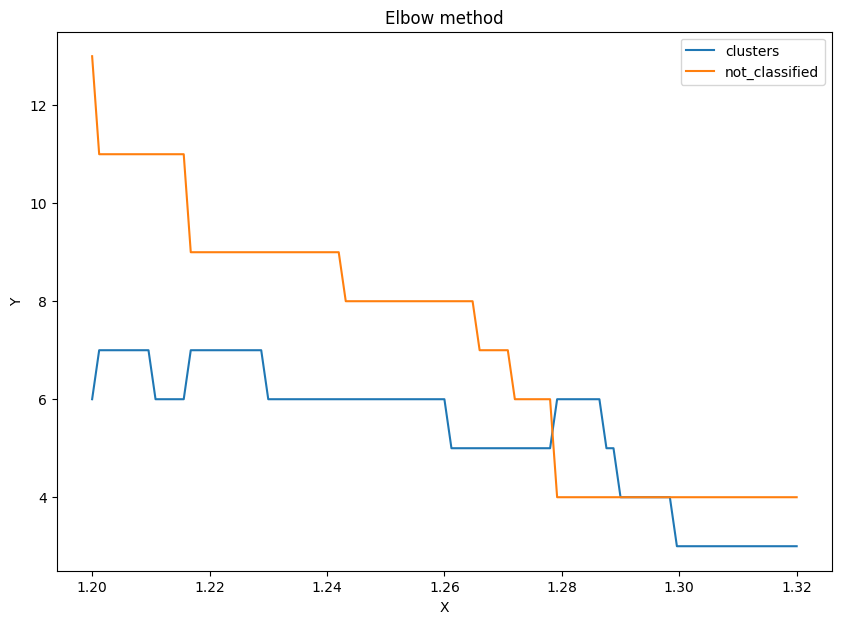

In [13]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds core samples in regions of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

N = 100
lower, higher = 1.2, 1.32
delta = (higher - lower) / N

x, clusters, not_classified = list[float](), list[int](), list[int]()
for i in range(N + 1):
    # print(i)
    cols = set[str]()
    unknown = 0
    eps = lower + i * delta
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    
    for j, _ in enumerate(articles):
        cluster = dbscan.labels_[j]
        color = 'k' if cluster == -1 else COLORS[cluster]
        cols.add(color)
        unknown += 1 if color == 'k' else 0
        
    x.append(eps)
    clusters.append(len(cols))
    not_classified.append(unknown)

plt.figure(figsize=(10, 7))

plt.plot(x, clusters, label='clusters')
plt.plot(x, not_classified, label='not_classified')
plt.title('Elbow method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [16]:
dbscan = DBSCAN(eps=1.29, min_samples=2) # eps = 1.29, min_samples = 8
dbscan.fit(X)

labels = dbscan.labels_
wiki_cl = pd.DataFrame(list(zip(articles, labels)), columns=['articles', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

# Получение двумерного представления данных с помощью TSNE
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
# X_2d = tsne.fit_transform(X.toarray())

# X_2d = X

# Визуализация результатов кластеризации
# plt.figure(figsize=(10, 7))
# for i, article in enumerate(articles):
#     cluster = dbscan.labels_[i]
#     color = 'k' if cluster == -1 else COLORS[cluster]
#     plt.scatter(X_2d[i, 0], X_2d[i, 1], color=color, marker='o')
# 
# plt.title('DBSCAN Clustering')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

                                             articles  cluster
20  A cap is a flat headgear, usually with a visor...       -1
27  A passport is an official travel document issu...       -1
30  The thorax (pl.: thoraces or thoraxes) or ches...       -1
7   Marshal is a term used in several official tit...       -1
0   A Formula One car or F1 car is a single-seat, ...        0
14  In car design, ground effect is a series of ef...        0
13  Red Bull Racing, currently competing as Oracle...        0
12  Scuderia Toro Rosso (Italian pronunciation: [s...        0
10  Bernd Mayländer (born 29 May 1971 in Waiblinge...        0
11  The FIA Super Licence is a driver's qualificat...        0
8   In a motorsports race, the pole position is us...        0
6   In motorsport, a safety car, or a pace car, is...        0
5   Max Emilian Verstappen (Dutch pronunciation: [...        0
4   Sir Lewis Carl Davidson Hamilton   (born 7 Jan...        0
3   An open-wheel car is a car with the wheels out...  